# 내 코드

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from typing import TypedDict

class GreetState(TypedDict):
    name : str
    greeting : str

In [4]:
def normalize_name(state : GreetState) -> GreetState:
    name = state['name']
    name = name.strip()
    name = name[0].upper() + name[1:].lower()

    return {'name' : name}

In [5]:
import random

def making_greeting(state : GreetState) -> GreetState:
    name = state['name']
    greeting_sentenses = ['Hello ', 'Nice to meet you, ', "It's glad to meet you, "]
    greeting_sentense = random.choice(greeting_sentenses)

    greeting = greeting_sentense + name + "!"

    return {"greeting" : greeting}

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(GreetState)

builder.add_node("normalize_name", normalize_name)
builder.add_node("making_greeting", making_greeting)

builder.add_edge(START, "normalize_name")
builder.add_edge("normalize_name", "making_greeting")
builder.add_edge("making_greeting", END)

graph = builder.compile()

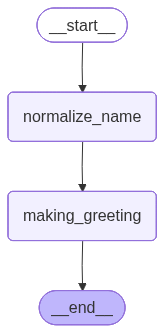

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
def print_result(result: GreetState):
    print("\n --- 결과---")
    print("\n 이름 : ", result["name"])
    print("\n 인사 : ", result["greeting"])
    print("="*40)

inputs = {"name": "   cHeOn seJun  "} #invoke 호출 시에 최소한의 키가 있어야 한다.

for _ in range(2):
    result = graph.invoke(inputs)
    print_result(result)
    print()


 --- 결과---

 이름 :  Cheon sejun

 인사 :  It's glad to meet you, Cheon sejun!


 --- 결과---

 이름 :  Cheon sejun

 인사 :  Nice to meet you, Cheon sejun!



# 교수님 작성 코드

In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [11]:
class HelloState(TypedDict):
    name : str
    greeting : str

In [12]:
def normalize_name(state : HelloState) -> HelloState:
    raw = state.get("name","")
    normalized = " ".join(raw.split()).title() #좌우 공백 제거, 첫 문자 대문자.

    return {'name' : normalized}

def making_greeting(state : HelloState) -> HelloState:
    name = state.get("name","")

    return {"greeting" : f"Hello, {name}!"}

In [13]:
builder = StateGraph(HelloState)

builder.add_node("normalize_name", normalize_name)
builder.add_node("making_greeting", making_greeting)

builder.add_edge(START, "normalize_name")
builder.add_edge("normalize_name", "making_greeting")
builder.add_edge("making_greeting", END)

graph = builder.compile()

In [14]:
def print_result(result: GreetState):
    print("\n --- 결과---")
    print("\n 이름 : ", result["name"])
    print("\n 인사 : ", result["greeting"])
    print("="*40)

inputs = {"name": "   cHeOn seJun  "} #invoke 호출 시에 최소한의 키가 있어야 한다.

for _ in range(2):
    result = graph.invoke(inputs)
    print_result(result)
    print()


 --- 결과---

 이름 :  Cheon Sejun

 인사 :  Hello, Cheon Sejun!


 --- 결과---

 이름 :  Cheon Sejun

 인사 :  Hello, Cheon Sejun!

